In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
stock_data = yf.download('AAPL', start='2023-01-01')


In [4]:
stock_data.head(10)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-01-03,123.470604,129.226044,122.582112,128.613978,112117500
2023-01-04,124.744118,127.014709,123.480487,125.267339,89113600
2023-01-05,123.421242,126.136075,123.164572,125.504260,80962700
2023-01-06,127.962418,128.623848,123.292909,124.398589,87754700
2023-01-09,128.485641,131.703962,128.228972,128.801557,70790800
2023-01-10,129.058212,129.581433,126.481589,128.594221,63896200
2023-01-11,131.782928,131.802662,128.791677,129.571568,69458900
2023-01-12,131.703964,132.543085,129.759155,132.167955,71379600


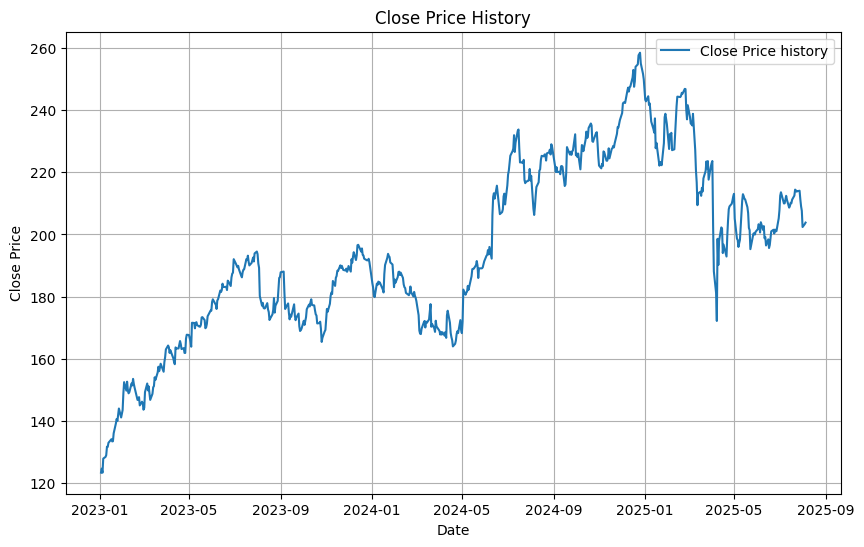

In [5]:
plt.figure(figsize=(10,6))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price history')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

## AR Model

In [ ]:
## making the data stationary before model fitting
apple_price_stationary = stock_data['Close'].diff().dropna()

# Split the data into training and testing datasets
train_data, test_data  = apple_price_stationary[:-30],  apple_price_stationary[-30:]

/tmp/ipython-input-1053492657.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download('AAPL', start='2023-01-01')
[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the po

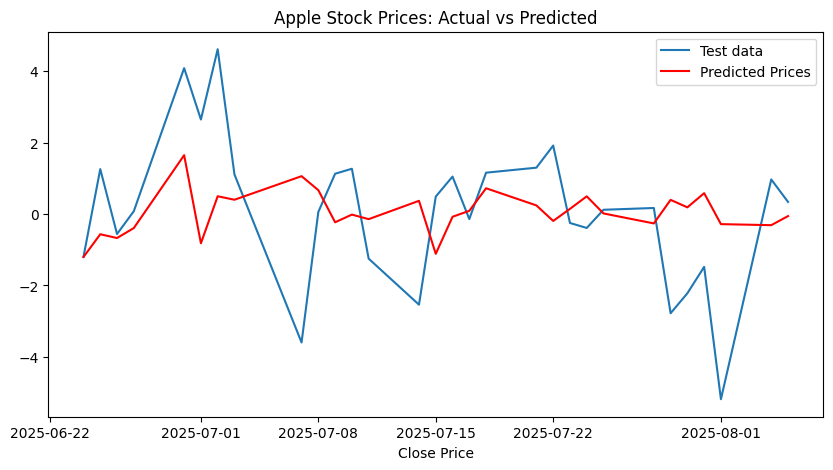

RMSE:  2.09


In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import numpy as np


## fitting the AutoRegressive Model (AR) to the training data
model = AutoReg(train_data, lags=30)
model_fit = model.fit()

## make predications on the test data
predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data)-1,
    dynamic=False
)


## plotting the actual vs predicted values
plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color='red', label='Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')  ## ran the cell before
plt.legend()
plt.show()


## evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE: ', rmse)



### rmse: is low

-  end here!